In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/home/theuri/Downloads/1549Assignment 2/WA_Fn-UseC_-HR-Employee-Attrition.csv')
ibm = pd.DataFrame(data=df)

In [3]:
ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
ibm[(ibm['Attrition']=='Yes')]['DailyRate'].mean()

750.3628691983122

In [5]:
ibm[(ibm['Attrition']=='No')]['DailyRate'].mean()

812.5044606650446

In [6]:
#Shows that dailyrate led to attrition as it was lower than that of those still working in IBM

In [7]:
ibm[(ibm['Attrition']=='Yes') & (ibm['BusinessTravel']=='Travel_Rarely')].__len__()

156

In [8]:
ibm[(ibm['Attrition']=='No') & (ibm['BusinessTravel']=='Travel_Rarely')].__len__()

887

In [9]:
ibm[(ibm['Attrition']=='Yes') & (ibm['BusinessTravel']=='Travel_Frequently')].__len__()

69

In [10]:
ibm[(ibm['Attrition']=='No') & (ibm['BusinessTravel']=='Travel_Frequently')].__len__()

208

In [11]:
ibm.__len__()

1470

In [12]:
ibm[(ibm['Attrition']=='Yes')]['DistanceFromHome'].mean()

10.632911392405063

In [13]:
ibm[(ibm['Attrition']=='No')]['DistanceFromHome'].mean()

8.915652879156529

In [14]:
# It is clear that the Distance from Home affects attrition as those leaving leave further from home.

In [15]:
ibm[(ibm['Attrition']=='No')]['StandardHours'].mean()

80.0

In [16]:
ibm[(ibm['Attrition']=='Yes')]['StandardHours'].mean()

80.0

In [17]:
# Since the avrage Standard Hours are equal for both those leaving and those working in the company,
# Standard HOurs are not a factor

In [18]:
ibm[(ibm['Attrition']=='Yes')]['YearsSinceLastPromotion'].mean()

1.9451476793248945

In [19]:
ibm[(ibm['Attrition']=='No')]['YearsSinceLastPromotion'].mean()

2.234387672343877

In [20]:
#Those leaving are often get promotions than those staying.
#The reasoning here may be that those leaving are likely to be ambitions than those staying

In [21]:
ibm["Department"].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [22]:
ibm.groupby(["Attrition", "Department"])["DistanceFromHome"].mean()

Attrition  Department            
No         Human Resources            7.588235
           Research & Development     8.964976
           Sales                      8.991525
Yes        Human Resources           13.416667
           Research & Development    10.263158
           Sales                     10.804348
Name: DistanceFromHome, dtype: float64

In [23]:
#It means that those that left the company travelled longer to work than those in the company. 
#What's more, those working in the human resource travelled the most, followed by Sales and Research and they left the company

In [24]:
#Since the standard hours are the same for all employees, daily rate is enough to use as monthly income
ibm.groupby(["Attrition", "Education"])["DailyRate"].mean()

Attrition  Education
No         1            820.532374
           2            834.899160
           3            793.845666
           4            823.923529
           5            777.558140
Yes        1            830.870968
           2            752.840909
           3            724.252525
           4            741.000000
           5            855.000000
Name: DailyRate, dtype: float64

In [25]:
#Those earning the most are leaving the company with an education level of 5 followed by those an education level of 3 but are staying with the company


In [26]:
ibm["EducationField"].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [27]:
ibm.groupby(["Attrition", "EducationField"])["EducationField"].count()

Attrition  EducationField  
No         Human Resources      20
           Life Sciences       517
           Marketing           124
           Medical             401
           Other                71
           Technical Degree    100
Yes        Human Resources       7
           Life Sciences        89
           Marketing            35
           Medical              63
           Other                11
           Technical Degree     32
Name: EducationField, dtype: int64

Text(0.5, 1.0, 'Attrition with respect to Education Field')

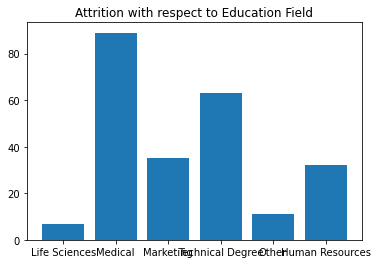

In [28]:
y = ibm[ibm['Attrition']=='Yes'].groupby('EducationField')['EducationField'].count()
x = ['Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources']
plt.bar(x,y)
plt.title('Attrition with respect to Education Field')
# Those leaving are in the Medical Education Field

Text(0.5, 1.0, 'Attrition with respect to Education Field')

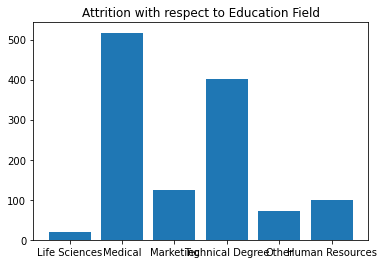

In [29]:
y = ibm[ibm['Attrition']=='No'].groupby('EducationField')['EducationField'].count()
x = ['Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources']
plt.bar(x,y)
plt.title('Attrition with respect to Education Field')
# Those staying are in the Medical Education Field

In [30]:
ibm.groupby(["Attrition", "Education"])["Education"].count()

Attrition  Education
No         1            139
           2            238
           3            473
           4            340
           5             43
Yes        1             31
           2             44
           3             99
           4             58
           5              5
Name: Education, dtype: int64

Text(0.5, 1.0, 'Attrition with respect to Education Level')

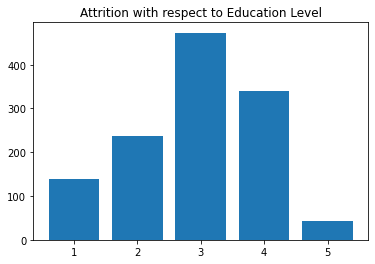

In [31]:
y = ibm[ibm['Attrition']=='No'].groupby('Education')['Education'].count()
x = [1,2,3,4,5]
plt.bar(x,y)
plt.title('Attrition with respect to Education Level')
# A majority of those staying have have an education level of 3

Text(0.5, 1.0, 'Attrition with respect to Education Level')

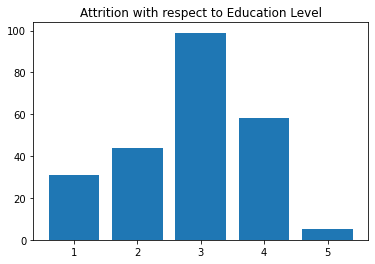

In [32]:
y = ibm[ibm['Attrition']=='Yes'].groupby('Education')['Education'].count()
x = [1,2,3,4,5]
plt.bar(x,y)
plt.title('Attrition with respect to Education Level')
# A majority of those leaving have have an education level of 3

Text(0.5, 1.0, 'Attrition with respect to Education Level')

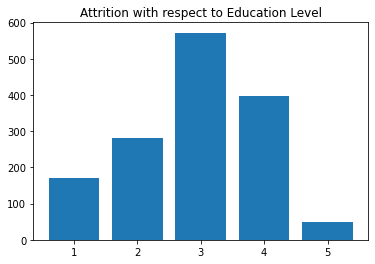

In [33]:
y = ibm.groupby('Education')['Education'].count()
x = [1,2,3,4,5]
plt.bar(x,y)
plt.title('Attrition with respect to Education Level')
# A majority of those in the records have an education level of 3

## Corrections on February 1, 2021

In [34]:
#df.groupby(['DistanceFromHome','JobRole','Attrition'])['Age'].count().unstack().head()

In [35]:
#df1 = df[['DistanceFromHome','JobRole','Attrition']]
#df1

In [36]:
#df1 = pd.get_dummies(df1,columns=['Attrition'])

In [37]:
#df1.groupby(['DistanceFromHome','JobRole']).sum().head(30)

In [38]:
#df['Education'].nunique()

In [39]:
#df.groupby(['Education','Attrition'])['MonthlyIncome'].mean().unstack()

## ASSIGNMENT 3


In [47]:
import matplotlib.pyplot as plt 

In [48]:
ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [75]:
df.groupby(['Education','Attrition'])['MonthlyIncome'].mean().unstack()

Attrition,No,Yes
Education,,
1,5926.129496,4360.161290
2,6586.058824,4282.545455
3,6882.919662,4770.242424
4,7087.814706,5335.155172
5,8559.906977,5850.200000


Text(0.5, 1.0, 'Average Monthly Income for Attrited Employees by Education Level')

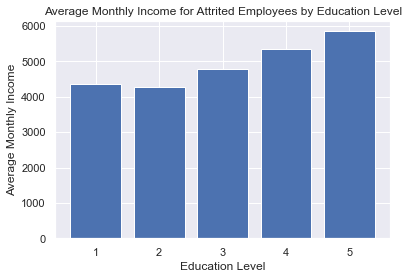

In [82]:
y = df[(df['Attrition']=='Yes')].groupby(['Education'])['MonthlyIncome'].mean()
x = [1,2,3,4,5]
plt.bar(x,y)
plt.xlabel('Education Level')
plt.ylabel('Average Monthly Income')
plt.title('Average Monthly Income for Attrited Employees by Education Level')

Text(0.5, 1.0, 'Average Monthly Income for Remaining Employees by Education Level')

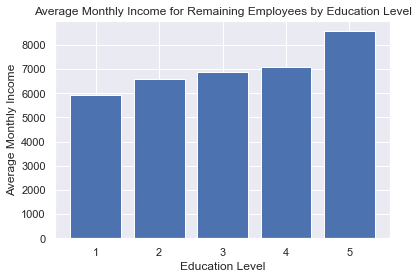

In [83]:
y = df[(df['Attrition']=='No')].groupby(['Education'])['MonthlyIncome'].mean()
x = [1,2,3,4,5]
plt.bar(x,y)
plt.xlabel('Education Level')
plt.ylabel('Average Monthly Income')
plt.title('Average Monthly Income for Remaining Employees by Education Level')

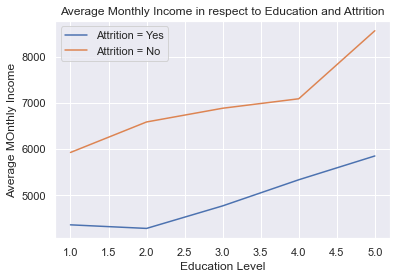

In [92]:
x = [1,2,3,4,5]
y = df[(df['Attrition']=='Yes')].groupby(['Education'])['MonthlyIncome'].mean()

x2 = [1,2,3,4,5]
y2 = df[(df['Attrition']=='No')].groupby(['Education'])['MonthlyIncome'].mean()

plt.plot(x, y, label='Attrition = Yes')
plt.plot(x2, y2, label='Attrition = No')


plt.xlabel('Education Level')
plt.ylabel('Average MOnthly Income')
plt.title('Average Monthly Income in respect to Education and Attrition')
plt.legend()
plt.show()